src:
- https://www.youtube.com/watch?v=jztwpsIzEGc
- https://github.com/nicknochnack/ImageClassification/blob/main/Getting%20Started.ipynb

# Dependencies and Setup

In [1]:
import tensorflow as tf

2025-03-14 09:51:19.013559: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-14 09:51:19.336122: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-14 09:51:19.618202: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741942279.866156   64305 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741942279.936546   64305 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-14 09:51:20.530796: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [2]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

2025-03-14 09:51:23.406954: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [3]:
tf.config.list_physical_devices('GPU')

[]

# Load Data

In [4]:
import numpy as np
from matplotlib import pyplot as plt

In [5]:
path = "../../Database/aug_images"
data = tf.keras.utils.image_dataset_from_directory(path)
class_names = data.class_names

Found 8325 files belonging to 22 classes.


In [6]:
data_iterator = data.as_numpy_iterator()

In [7]:
batch = data_iterator.next()

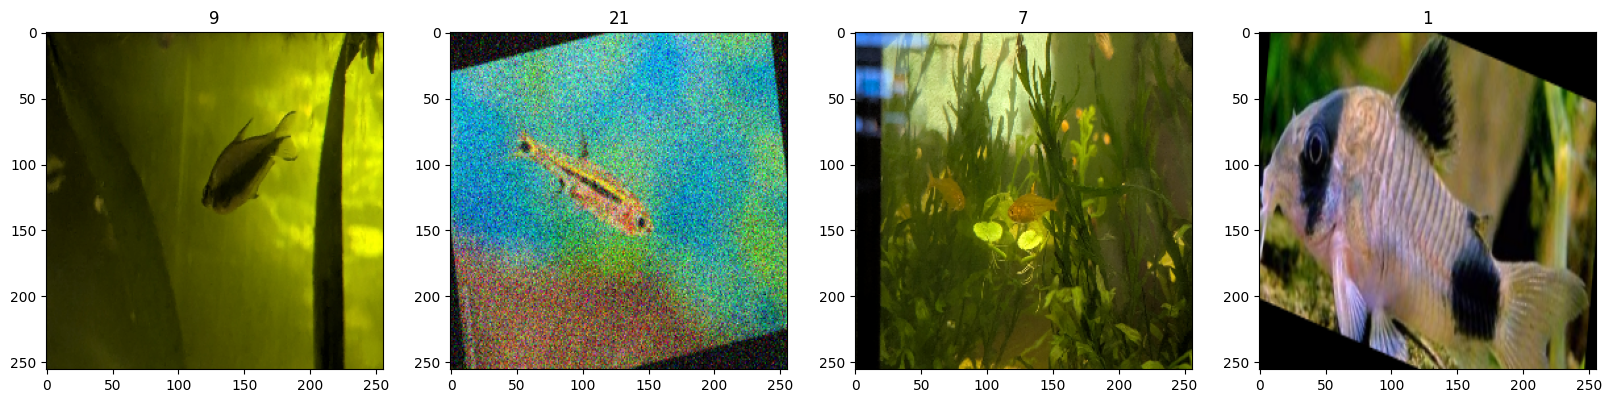

In [8]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# Scale Data

In [9]:
data = data.map(lambda x,y: (x/255, y))

In [10]:
data.as_numpy_iterator().next()

(array([[[[0.10603829, 0.1929999 , 0.0391513 ],
          [0.23756355, 0.17801785, 0.09109895],
          [0.35875595, 0.29377207, 0.30658466],
          ...,
          [0.23158136, 0.17784306, 0.1637333 ],
          [0.26974812, 0.22251812, 0.08201752],
          [0.21374407, 0.11749845, 0.2025583 ]],
 
         [[0.0357961 , 0.0389684 , 0.19251198],
          [0.04427496, 0.07536564, 0.0476587 ],
          [0.30182078, 0.33192167, 0.21841365],
          ...,
          [0.11426075, 0.0700709 , 0.08810048],
          [0.07285497, 0.05660652, 0.06598819],
          [0.01415163, 0.01037786, 0.09864918]],
 
         [[0.05539937, 0.00848066, 0.10393141],
          [0.08559851, 0.15668069, 0.09240675],
          [0.18762067, 0.14151591, 0.13802056],
          ...,
          [0.19539475, 0.20597474, 0.2512399 ],
          [0.07915437, 0.05067964, 0.05945973],
          [0.15045851, 0.1905072 , 0.25041652]],
 
         ...,
 
         [[0.04660767, 0.06346373, 0.19129543],
          [0.02275

# Split Data

In [11]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [12]:
train_size

182

In [13]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# Extract images and labels

In [14]:
train_images = []
train_labels = []

In [15]:
for images, labels in train:
    train_images.append(images.numpy())  # Append image batch
    train_labels.append(labels.numpy())  # Append label batch

2025-03-14 09:51:32.278742: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [16]:
# Convert lists to numpy arrays
train_images = np.concatenate(train_images, axis=0)  # Concatenate all batches along the first axis (samples)
train_labels = np.concatenate(train_labels, axis=0)

In [17]:
val_images = []
val_labels = []

In [18]:
for images, labels in val:
    val_images.append(images.numpy())  # Append image batch
    val_labels.append(labels.numpy())  # Append label batch

print("val_labels before concatenation:", val_labels)

val_labels before concatenation: [array([ 6, 18, 15, 11,  2,  0, 17, 16, 18, 17,  3, 10,  9, 16, 12, 12,  5,
        7,  4, 14,  4, 11, 10,  2,  6,  9,  6, 15,  4, 14,  5,  1],
      dtype=int32), array([ 4, 20, 12,  1,  2, 15,  1, 14, 14, 19,  3, 11,  0, 13,  2,  5, 19,
       15, 11,  5, 16,  1, 16,  2, 12, 13, 21,  9, 19,  1, 14, 10],
      dtype=int32), array([10, 15,  5,  9, 10,  7,  2,  5,  1,  4,  5,  4,  4,  8,  6,  7, 14,
       10, 14, 13,  5, 16,  2, 16,  6, 16, 17,  9,  4,  9,  7, 15],
      dtype=int32), array([13, 12, 13, 16,  5, 17, 15,  7, 11, 15, 20,  4,  0, 11, 12,  7,  7,
       17, 12, 19,  1, 10, 10,  3, 10,  0,  7,  5,  9, 12,  1, 15],
      dtype=int32), array([ 9,  7,  3, 21, 19, 20,  9,  0,  4, 13,  5,  3, 21, 11,  0, 18, 12,
        5,  6,  7,  7, 13, 17, 12,  8,  1, 14, 14, 16, 16,  6, 17],
      dtype=int32), array([ 7, 18,  5,  5,  4,  7, 16,  3,  4, 20,  7,  1, 13, 14,  1, 10,  7,
        6,  0,  9, 21, 16,  9, 10,  4, 18,  4,  2,  1,  4, 15,  7],
      dt

2025-03-14 09:51:40.652828: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [19]:
# Convert lists to numpy arrays
val_images = np.concatenate(val_images, axis=0)  # Concatenate all batches along the first axis (samples)
val_labels = np.concatenate(val_labels, axis=0)

# Build Deep Learning Model

In [20]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [22]:
model = Sequential()

In [23]:
# First convolutional layer
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

# Second convolutional layer
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

# Third convolutional layer
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

# Flatten layer
model.add(Flatten())

# Fully connected layer
model.add(Dense(256, activation='relu'))

# Output layer for 22 classes
model.add(Dense(22, activation='softmax'))

/run/media/mad/SATA_SSD/Projekte/Git/Varanasi3DErfassung/AquariumFishRecognition/.venv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
from tensorflow.keras.utils import to_categorical

In [25]:
# One-hot encode the labels
# One-hot encode the labels
train_labels_one_hot = to_categorical(train_labels, num_classes=22)
val_labels_one_hot = to_categorical(val_labels, num_classes=22)

# Check shapes of the data
print("train_images shape:", train_images.shape)  # (num_train_samples, height, width, channels)
print("train_labels_one_hot shape:", train_labels_one_hot.shape)  # (num_train_samples, 22)
print("val_images shape:", val_images.shape)  # (num_val_samples, height, width, channels)
print("val_labels_one_hot shape:", val_labels_one_hot.shape)  # (num_val_samples, 22)

train_images shape: (5824, 256, 256, 3)
train_labels_one_hot shape: (5824, 22)
val_images shape: (1664, 256, 256, 3)
val_labels_one_hot shape: (1664, 22)


In [26]:
# Compile the model with categorical crossentropy
model.compile(optimizer='adam', loss=tf.losses.CategoricalCrossentropy(), metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 22)             │         5,654 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,702,022 (14.12 MB)

 Trainable params: 3,702,022 (14.12 MB)

 Non-trainable params: 0 (0.00 B)

# Train

In [28]:
logdir='logs'

In [29]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [30]:
hist = model.fit(train_images, train_labels_one_hot, epochs=5,
                 validation_data=(val_images, val_labels_one_hot),
                 callbacks=[tensorboard_callback])


Epoch 1/5


2025-03-14 09:51:42.490875: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 4580179968 exceeds 10% of free system memory.


182/182 ━━━━━━━━━━━━━━━━━━━━ 71s 384ms/step - accuracy: 0.1398 - loss: 2.9195 - val_accuracy: 0.2572 - val_loss: 2.4155
Epoch 2/5
182/182 ━━━━━━━━━━━━━━━━━━━━ 70s 382ms/step - accuracy: 0.3287 - loss: 2.2022 - val_accuracy: 0.3894 - val_loss: 1.9760
Epoch 3/5
182/182 ━━━━━━━━━━━━━━━━━━━━ 69s 381ms/step - accuracy: 0.5792 - loss: 1.4412 - val_accuracy: 0.4958 - val_loss: 1.6854
Epoch 4/5
182/182 ━━━━━━━━━━━━━━━━━━━━ 69s 381ms/step - accuracy: 0.7932 - loss: 0.7168 - val_accuracy: 0.5541 - val_loss: 1.6607
Epoch 5/5
182/182 ━━━━━━━━━━━━━━━━━━━━ 70s 382ms/step - accuracy: 0.9202 - loss: 0.2907 - val_accuracy: 0.5661 - val_loss: 1.9437


# Plot Performance

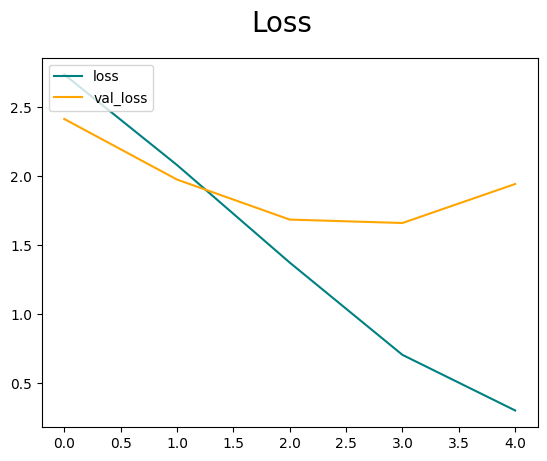

In [31]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

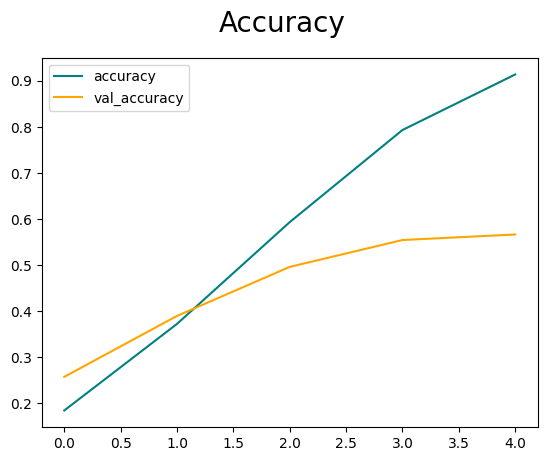

In [32]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# Evaluate

In [33]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [34]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [35]:
# Iterate over test dataset
for batch in test.as_numpy_iterator():
    X, y = batch

    # Ensure `y` is one-hot encoded
    y_one_hot = to_categorical(y, num_classes=22)  # Convert labels to one-hot

    # Get model predictions
    yhat = model.predict(X)

    # Update metrics
    pre.update_state(y_one_hot, yhat)  # Use one-hot encoded labels
    re.update_state(y_one_hot, yhat)   # Use one-hot encoded labels
    acc.update_state(y_one_hot, yhat)  # Use one-hot encoded labels

# Print final metric values
print(f'Precision: {pre.result().numpy()}')
print(f'Recall: {re.result().numpy()}')
print(f'Accuracy: {acc.result().numpy()}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
Precision

# Test

In [36]:
import cv2

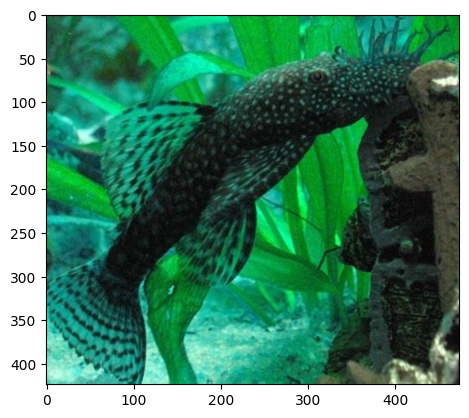

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Predicted class is(Ancistrus_dolichopterus): Danio_rerio


In [37]:
img = cv2.imread('test_pictures/Ancistrus_dolichopterus.png')
plt.imshow(img)
plt.show()

resize = tf.image.resize(img, (256,256))

plt.show()

yhat = model.predict(np.expand_dims(resize/255, 0))

# Get predicted class index
predicted_class = np.argmax(yhat)  # Get the index of the highest probability

# Print the predicted class
print(f'Predicted class is(Ancistrus_dolichopterus): {class_names[predicted_class]}')

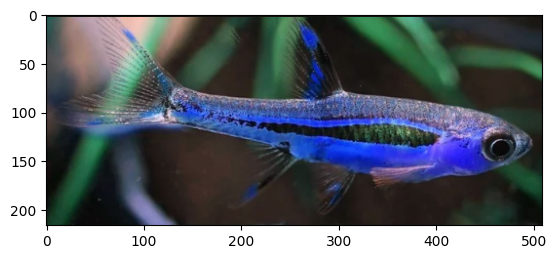

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Predicted class is(Boraras_brigittae): Inpaichthys_kerri


In [38]:
img = cv2.imread('test_pictures/Boraras_brigittae.png')
plt.imshow(img)
plt.show()

resize = tf.image.resize(img, (256,256))

plt.show()

yhat = model.predict(np.expand_dims(resize/255, 0))

# Get predicted class index
predicted_class = np.argmax(yhat)  # Get the index of the highest probability

# Print the predicted class
print(f'Predicted class is(Boraras_brigittae): {class_names[predicted_class]}')

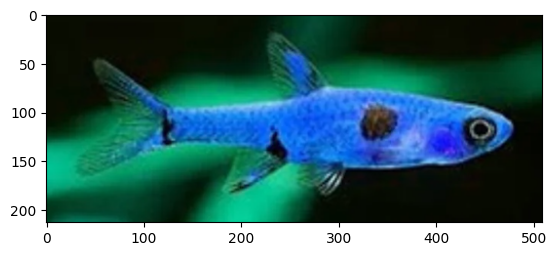

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Predicted class is(Boraras_maculatus): Inpaichthys_kerri


In [39]:
img = cv2.imread('test_pictures/Boraras_maculatus.png')
plt.imshow(img)
plt.show()

resize = tf.image.resize(img, (256,256))

plt.show()

yhat = model.predict(np.expand_dims(resize/255, 0))

# Get predicted class index
predicted_class = np.argmax(yhat)  # Get the index of the highest probability

# Print the predicted class
print(f'Predicted class is(Boraras_maculatus): {class_names[predicted_class]}')

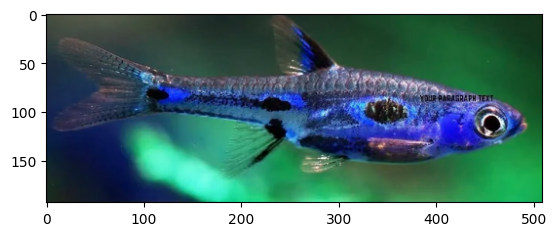

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Predicted class is(Boraras_merah): Corydoras_pygmaeus


In [40]:
img = cv2.imread('test_pictures/Boraras_merah.png')
plt.imshow(img)
plt.show()

resize = tf.image.resize(img, (256,256))

plt.show()

yhat = model.predict(np.expand_dims(resize/255, 0))

# Get predicted class index
predicted_class = np.argmax(yhat)  # Get the index of the highest probability

# Print the predicted class
print(f'Predicted class is(Boraras_merah): {class_names[predicted_class]}')

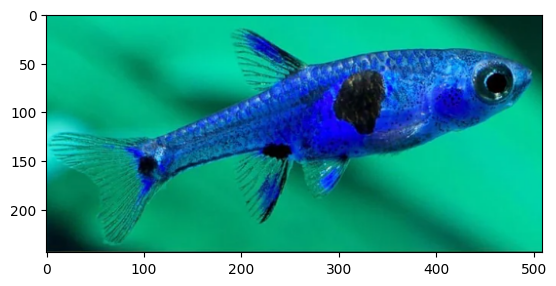

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Predicted class is(Boraras_naevus): Inpaichthys_kerri


In [41]:
img = cv2.imread('test_pictures/Boraras_naevus.png')
plt.imshow(img)
plt.show()

resize = tf.image.resize(img, (256,256))

plt.show()

yhat = model.predict(np.expand_dims(resize/255, 0))

# Get predicted class index
predicted_class = np.argmax(yhat)  # Get the index of the highest probability

# Print the predicted class
print(f'Predicted class is(Boraras_naevus): {class_names[predicted_class]}')

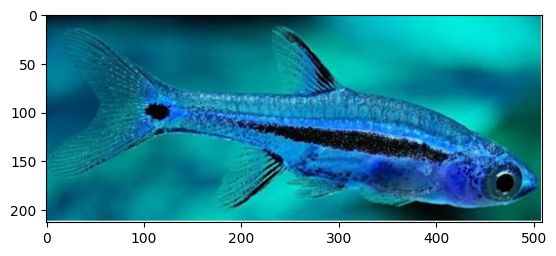

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Predicted class is(Boraras_urophtalmoides): Inpaichthys_kerri


In [42]:
img = cv2.imread('test_pictures/Boraras_urophtalmoides.png')
plt.imshow(img)
plt.show()

resize = tf.image.resize(img, (256,256))

plt.show()

yhat = model.predict(np.expand_dims(resize/255, 0))

# Get predicted class index
predicted_class = np.argmax(yhat)  # Get the index of the highest probability

# Print the predicted class
print(f'Predicted class is(Boraras_urophtalmoides): {class_names[predicted_class]}')

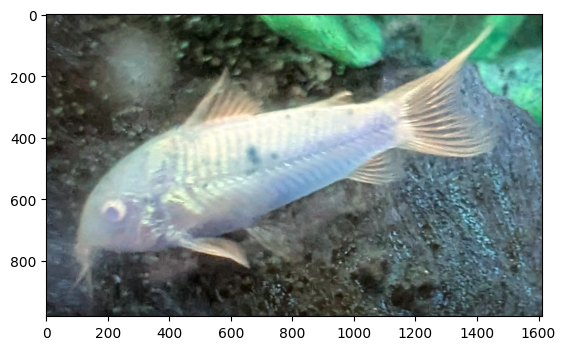

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Predicted class is(Corydoras_paleatus): Trichogaster_trichopterus


In [43]:
img = cv2.imread('test_pictures/Corydoras_paleatus.jpg')
plt.imshow(img)
plt.show()

resize = tf.image.resize(img, (256,256))

plt.show()

yhat = model.predict(np.expand_dims(resize/255, 0))

# Get predicted class index
predicted_class = np.argmax(yhat)  # Get the index of the highest probability

# Print the predicted class
print(f'Predicted class is(Corydoras_paleatus): {class_names[predicted_class]}')

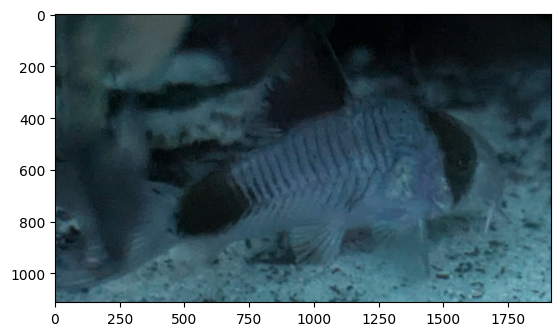

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted class is(Corydoras_Panda): Hyphessobrycon_amandae


In [44]:
img = cv2.imread('test_pictures/Corydoras_Panda.jpg')
plt.imshow(img)
plt.show()

resize = tf.image.resize(img, (256,256))

plt.show()

yhat = model.predict(np.expand_dims(resize/255, 0))

# Get predicted class index
predicted_class = np.argmax(yhat)  # Get the index of the highest probability

# Print the predicted class
print(f'Predicted class is(Corydoras_Panda): {class_names[predicted_class]}')

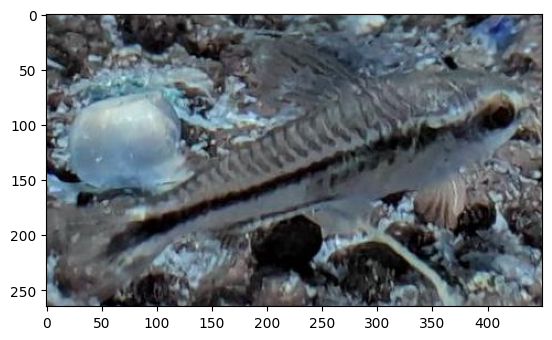

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted class is(Corydoras_pygmaeus): Crossocheilus_reticulatus


In [45]:
img = cv2.imread('test_pictures/Corydoras_pygmaeus.jpeg')
plt.imshow(img)
plt.show()

resize = tf.image.resize(img, (256,256))

plt.show()

yhat = model.predict(np.expand_dims(resize/255, 0))

# Get predicted class index
predicted_class = np.argmax(yhat)  # Get the index of the highest probability

# Print the predicted class
print(f'Predicted class is(Corydoras_pygmaeus): {class_names[predicted_class]}')

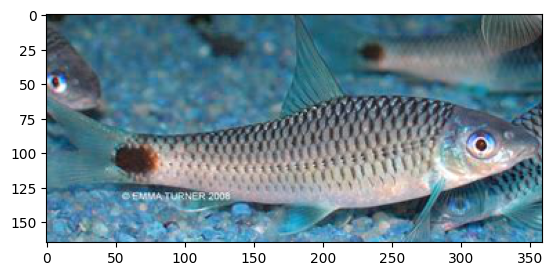

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted class is(Crossocheilus_reticulatus): Hyphessobrycon_amandae


In [46]:
img = cv2.imread('test_pictures/Crossocheilus_reticulatus.png')
plt.imshow(img)
plt.show()

resize = tf.image.resize(img, (256,256))

plt.show()

yhat = model.predict(np.expand_dims(resize/255, 0))

# Get predicted class index
predicted_class = np.argmax(yhat)  # Get the index of the highest probability

# Print the predicted class
print(f'Predicted class is(Crossocheilus_reticulatus): {class_names[predicted_class]}')

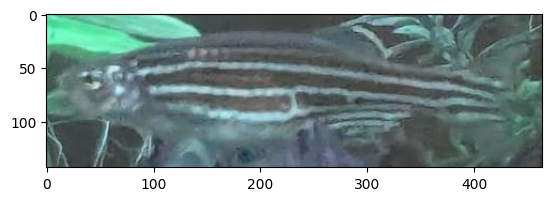

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted class is(Danio_rerio): Danio_rerio


In [47]:
img = cv2.imread('test_pictures/Danio_rerio.jpeg')
plt.imshow(img)
plt.show()

resize = tf.image.resize(img, (256,256))

plt.show()

yhat = model.predict(np.expand_dims(resize/255, 0))

# Get predicted class index
predicted_class = np.argmax(yhat)  # Get the index of the highest probability

# Print the predicted class
print(f'Predicted class is(Danio_rerio): {class_names[predicted_class]}')

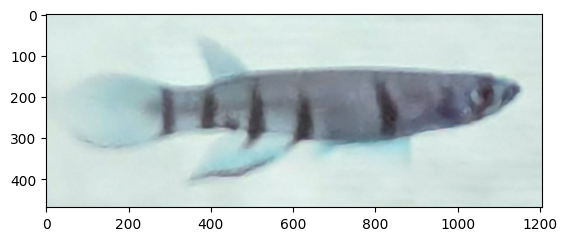

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted class is(Epiplatys_dageti): Epiplatys_dageti


In [48]:
img = cv2.imread('test_pictures/Epiplatys_dageti.jpg')
plt.imshow(img)
plt.show()

resize = tf.image.resize(img, (256,256))

plt.show()

yhat = model.predict(np.expand_dims(resize/255, 0))

# Get predicted class index
predicted_class = np.argmax(yhat)  # Get the index of the highest probability

# Print the predicted class
print(f'Predicted class is(Epiplatys_dageti): {class_names[predicted_class]}')

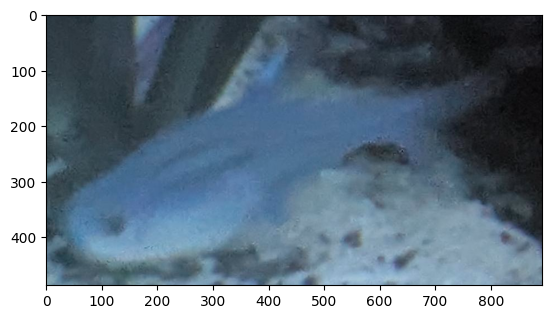

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Predicted class is(Hyphessobrycon_amandae): Hyphessobrycon_amandae


In [49]:
img = cv2.imread('test_pictures/Hyphessobrycon_amandae.jpg')
plt.imshow(img)
plt.show()

resize = tf.image.resize(img, (256,256))

plt.show()

yhat = model.predict(np.expand_dims(resize/255, 0))

# Get predicted class index
predicted_class = np.argmax(yhat)  # Get the index of the highest probability

# Print the predicted class
print(f'Predicted class is(Hyphessobrycon_amandae): {class_names[predicted_class]}')

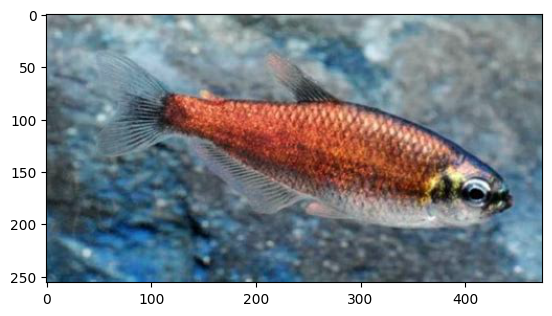

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Predicted class is(Inpaichthys_kerri): Hyphessobrycon_amandae


In [50]:
img = cv2.imread('test_pictures/Inpaichthys_kerri.png')
plt.imshow(img)
plt.show()

resize = tf.image.resize(img, (256,256))

plt.show()

yhat = model.predict(np.expand_dims(resize/255, 0))

# Get predicted class index
predicted_class = np.argmax(yhat)  # Get the index of the highest probability

# Print the predicted class
print(f'Predicted class is(Inpaichthys_kerri): {class_names[predicted_class]}')

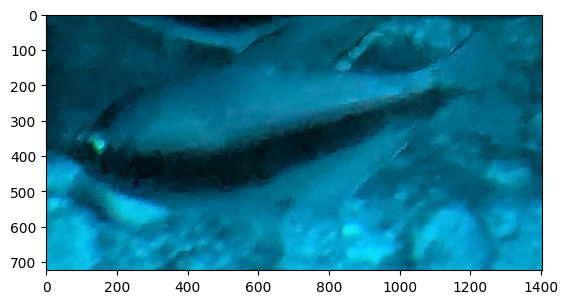

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Predicted class is(Nematobrycon_palmeri): Corydoras_pygmaeus


In [51]:
img = cv2.imread('test_pictures/Nematobrycon_palmeri.jpg')
plt.imshow(img)
plt.show()

resize = tf.image.resize(img, (256,256))

plt.show()

yhat = model.predict(np.expand_dims(resize/255, 0))

# Get predicted class index
predicted_class = np.argmax(yhat)  # Get the index of the highest probability

# Print the predicted class
print(f'Predicted class is(Nematobrycon_palmeri): {class_names[predicted_class]}')

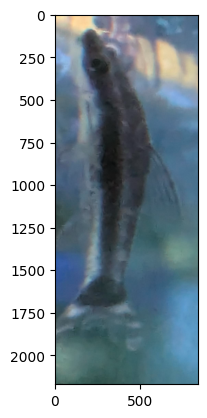

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Predicted class is(Otocinclus_affinis): Crossocheilus_reticulatus


In [52]:
img = cv2.imread('test_pictures/Otocinclus_affinis.jpg')
plt.imshow(img)
plt.show()

resize = tf.image.resize(img, (256,256))

plt.show()

yhat = model.predict(np.expand_dims(resize/255, 0))

# Get predicted class index
predicted_class = np.argmax(yhat)  # Get the index of the highest probability

# Print the predicted class
print(f'Predicted class is(Otocinclus_affinis): {class_names[predicted_class]}')

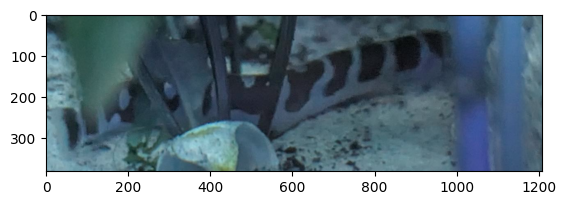

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Predicted class is(Pangio_kuhlii): Hyphessobrycon_amandae


In [53]:
img = cv2.imread('test_pictures/Pangio_kuhlii.jpg')
plt.imshow(img)
plt.show()

resize = tf.image.resize(img, (256,256))

plt.show()

yhat = model.predict(np.expand_dims(resize/255, 0))

# Get predicted class index
predicted_class = np.argmax(yhat)  # Get the index of the highest probability

# Print the predicted class
print(f'Predicted class is(Pangio_kuhlii): {class_names[predicted_class]}')

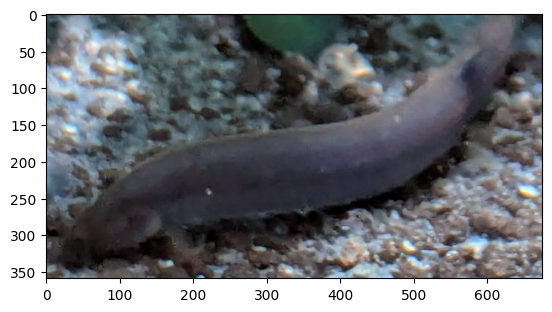

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Predicted class is(Pangio_pangia): Pangio_pangia


In [54]:
img = cv2.imread('test_pictures/Pangio_pangia.jpeg')
plt.imshow(img)
plt.show()

resize = tf.image.resize(img, (256,256))

plt.show()

yhat = model.predict(np.expand_dims(resize/255, 0))

# Get predicted class index
predicted_class = np.argmax(yhat)  # Get the index of the highest probability

# Print the predicted class
print(f'Predicted class is(Pangio_pangia): {class_names[predicted_class]}')

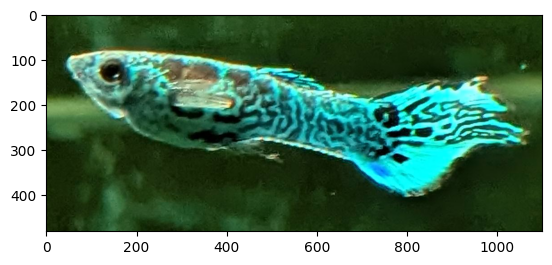

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted class is(Poecilia_wingei): Danio_rerio


In [55]:
img = cv2.imread('test_pictures/Poecilia_wingei.jpg')
plt.imshow(img)
plt.show()

resize = tf.image.resize(img, (256,256))

plt.show()

yhat = model.predict(np.expand_dims(resize/255, 0))

# Get predicted class index
predicted_class = np.argmax(yhat)  # Get the index of the highest probability

# Print the predicted class
print(f'Predicted class is(Poecilia_wingei): {class_names[predicted_class]}')

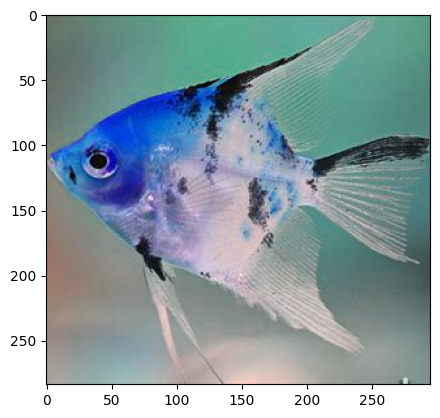

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Predicted class is(Pterophyllum_scalare): Epiplatys_dageti


In [56]:
img = cv2.imread('test_pictures/Pterophyllum_scalare.png')
plt.imshow(img)
plt.show()

resize = tf.image.resize(img, (256,256))

plt.show()

yhat = model.predict(np.expand_dims(resize/255, 0))

# Get predicted class index
predicted_class = np.argmax(yhat)  # Get the index of the highest probability

# Print the predicted class
print(f'Predicted class is(Pterophyllum_scalare): {class_names[predicted_class]}')

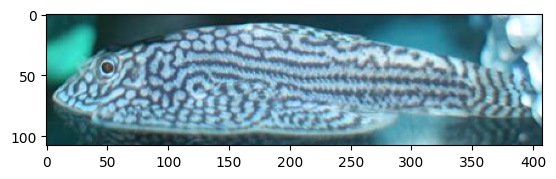

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted class is(Sewellia_lineolata): Danio_rerio


In [57]:
img = cv2.imread('test_pictures/Sewellia_lineolata.png')
plt.imshow(img)
plt.show()

resize = tf.image.resize(img, (256,256))

plt.show()

yhat = model.predict(np.expand_dims(resize/255, 0))

# Get predicted class index
predicted_class = np.argmax(yhat)  # Get the index of the highest probability

# Print the predicted class
print(f'Predicted class is(Sewellia_lineolata): {class_names[predicted_class]}')

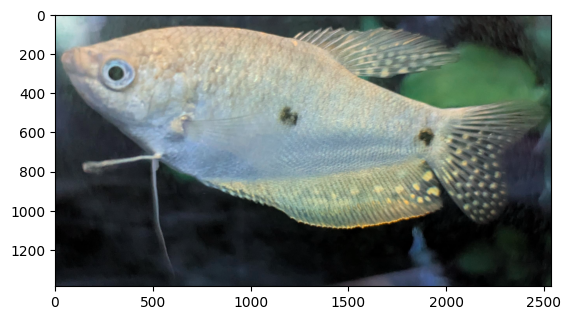

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted class is(Trichogaster_trichopterus): Trichogaster_trichopterus


In [58]:
img = cv2.imread('test_pictures/Trichogaster_trichopterus.jpg')
plt.imshow(img)
plt.show()

resize = tf.image.resize(img, (256,256))

plt.show()

yhat = model.predict(np.expand_dims(resize/255, 0))

# Get predicted class index
predicted_class = np.argmax(yhat)  # Get the index of the highest probability

# Print the predicted class
print(f'Predicted class is(Trichogaster_trichopterus): {class_names[predicted_class]}')